<a href="https://colab.research.google.com/github/yeeun0813/baewha/blob/main/ocr%EA%B3%BC%EC%A0%9C_2025200112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# 폴더 정리 및 만들기
!rm -rf ocr_test_image
!mkdir ocr_test_image

# GitHub에서 이미지 다운로드
!cd ocr_test_image && wget https://github.com/yeeun0813/baewha/raw/main/kimyeeun_.jpg


--2025-04-14 11:28:43--  https://github.com/yeeun0813/baewha/raw/main/kimyeeun_.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yeeun0813/baewha/main/kimyeeun_.jpg [following]
--2025-04-14 11:28:43--  https://raw.githubusercontent.com/yeeun0813/baewha/main/kimyeeun_.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36738 (36K) [image/jpeg]
Saving to: ‘kimyeeun_.jpg’

kimyeeun_.jpg       100%[===================>]  35.88K  --.-KB/s    in 0.001s  

2025-04-14 11:28:43 (25.3 MB/s) - ‘kimyeeun_.jpg’ saved [36738/36738]



Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

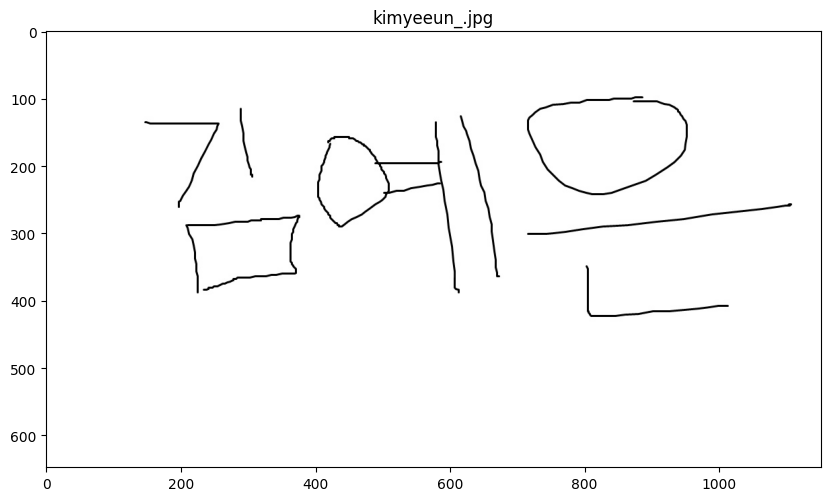

📝 인식된 글자: 75041.


In [14]:
from PIL import Image
import matplotlib.pyplot as plt
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# 모델 불러오기
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# 이미지 열기
image = Image.open("./ocr_test_image/kimyeeun_.jpg").convert("RGB")

# 이미지 보여주기
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.title("kimyeeun_.jpg")
plt.show()

# OCR 실행
inputs = processor(images=image, return_tensors="pt")
generated_ids = model.generate(inputs.pixel_values)
text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# 결과 출력
print("📝 인식된 글자:", text)
